- Importacion de librerias

In [ ]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
import plotly.graph_objects as go
from pylab import rcParams
sns.set_theme(style="ticks", palette="pastel")
import calplot

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [1]:
pd.reset_option("max_columns")
pd.set_option("max_colwidth",None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

- Lectura de CSV

In [2]:
df= pd.read_csv('../data.csv',encoding='latin1')

- Frist look of the dataset

In [3]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


- Total amount of observations

In [4]:
print(len(df))

541909


- Top 10 products

In [5]:
df.groupby('Description').agg({'Quantity':'count'}).sort_values(by='Quantity',ascending=False).head(10)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


- Highest bill invoice note

In [6]:
df.groupby('InvoiceNo').agg({'UnitPrice':'sum'}).sort_values(by='UnitPrice',ascending=False).head(10)

,UnitPrice
InvoiceNo,
C556445,38970.00
C580605,17836.46
C540117,16888.02
C540118,16453.71
537632,13541.33
C537651,13541.33
C537630,13541.33
C537644,13474.79
C580604,11586.50


- Total sales per Country

In [7]:
df.groupby('Country').agg({'UnitPrice':'sum'}).sort_values(by='UnitPrice',ascending=False).head(10)

,UnitPrice
Country,
United Kingdom,2245715.474
EIRE,48447.190
France,43031.990
Germany,37666.000
Singapore,25108.890
Portugal,13037.540
Spain,12633.450
Hong Kong,12241.500
Belgium,7540.130


In [8]:
df_counts= df.groupby('Country').agg({'InvoiceNo':'count'}).sort_values(by='InvoiceNo',ascending=False)

- Top sales per date

In [9]:
df.groupby('InvoiceDate').agg({'Quantity':'count'}).sort_values(by='Quantity',ascending=False).head(10)

,Quantity
InvoiceDate,
10/31/2011 14:41,1114
12/8/2011 9:28,749
12/9/2011 10:03,731
12/5/2011 17:24,721
6/29/2011 15:58,705
11/30/2011 15:13,687
12/8/2011 9:20,676
12/6/2010 16:57,675
12/5/2011 17:28,662


- Visualization of nan values

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
no_nan_description=df[~df['Description'].isna()]

- Checking the patterns in the Customer ID column

In [12]:
no_nan_description.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

- Checking a specific value

In [13]:
no_nan_description[no_nan_description['InvoiceNo']=='536544'].tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1960,536544,21679,SKULLS STICKERS,3,12/1/2010 14:32,1.66,NaN,United Kingdom
1961,536544,21703,BAG 125g SWIRLY MARBLES,1,12/1/2010 14:32,0.85,NaN,United Kingdom
1962,536544,21704,BAG 250g SWIRLY MARBLES,1,12/1/2010 14:32,1.66,NaN,United Kingdom
1963,536544,21706,FOLDING UMBRELLA RED/WHITE POLKADOT,2,12/1/2010 14:32,10.17,NaN,United Kingdom
1964,536544,21716,BOYS VINTAGE TIN SEASIDE BUCKET,1,12/1/2010 14:32,5.06,NaN,United Kingdom
1965,536544,21721,CANDY SHOP STICKER SHEET,1,12/1/2010 14:32,1.66,NaN,United Kingdom
1966,536544,21722,SWEET PUDDING STICKER SHEET,1,12/1/2010 14:32,1.66,NaN,United Kingdom
1967,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,12/1/2010 14:32,3.36,NaN,United Kingdom
1968,536544,21742,LARGE ROUND WICKER PLATTER,1,12/1/2010 14:32,12.72,NaN,United Kingdom
1969,536544,21758,VINTAGE SHELLS PRINT,1,12/1/2010 14:32,12.72,NaN,United Kingdom


In [14]:
no_id_nan= no_nan_description[~no_nan_description['CustomerID'].isna()]

- Lenght of loss regarding the elimination of NaN values

In [15]:
print(len(no_id_nan))
print(len(df))
print(len(df)-len(no_id_nan))

406829
541909
135080


- Tabular Visualization of the diference

In [16]:
no_id_nan_counts= no_id_nan.groupby('Country').agg({'InvoiceNo':'count'}).sort_values(by='InvoiceNo',ascending=False)

- Creating a view from the initial data vs the second tabular data to get the diference column

In [17]:
no_id_nan_counts = no_id_nan_counts.rename(columns={'InvoiceNo': 'no_id_nan_count'})
df_counts = df_counts.rename(columns={'InvoiceNo': 'df_count'})

comparison = no_id_nan_counts.join(df_counts, how='outer')

comparison['difference'] =comparison['df_count'] - comparison['no_id_nan_count'] 

comparison

,no_id_nan_count,df_count,difference
Country,,,
Australia,1259.0,1259,0.0
Austria,401.0,401,0.0
Bahrain,17.0,19,2.0
Belgium,2069.0,2069,0.0
Brazil,32.0,32,0.0
Canada,151.0,151,0.0
Channel Islands,758.0,758,0.0
Cyprus,622.0,622,0.0
Czech Republic,30.0,30,0.0


In [18]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
united_kingdom_customeridnan=df[df['CustomerID'].isna()&(df['Country']=='United Kingdom')]

In [20]:
united_kingdom_customeridnan.groupby('InvoiceNo').agg({'Quantity':'count'}).sort_values(by='Quantity',ascending=False)

,Quantity
InvoiceNo,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
551701,1
551704,1
551705,1


In [21]:
result = (united_kingdom_customeridnan
          .groupby(['InvoiceDate', 'InvoiceNo'])
          .agg({'Quantity': 'count'})
          .sort_values('Quantity', ascending=False))

In [22]:
result.head(20)

,,Quantity
InvoiceDate,InvoiceNo,
10/31/2011 14:41,573585,1114
12/8/2011 9:28,581219,749
12/9/2011 10:03,581492,731
12/5/2011 17:24,580729,721
6/29/2011 15:58,558475,705
11/30/2011 15:13,579777,687
12/8/2011 9:20,581217,676
12/6/2010 16:57,537434,675
12/5/2011 17:28,580730,662


In [23]:
united_kingdom_customeridnan['InvoiceDate'] = pd.to_datetime(united_kingdom_customeridnan['InvoiceDate'], errors='coerce').copy()


In [24]:
united_kingdom_customeridnan['InvoiceDate'] = united_kingdom_customeridnan['InvoiceDate'].dt.date

result = (united_kingdom_customeridnan
          .groupby(['InvoiceDate', 'InvoiceNo'])
          .agg({'Quantity': 'count'})
          .sort_values(['InvoiceDate', 'Quantity'], ascending=False)).copy()


In [25]:
result_2 = (united_kingdom_customeridnan
          .groupby(['InvoiceDate'])
          .agg({'Quantity': 'count'})
          .sort_values('InvoiceDate', ascending=True))


In [26]:
result_2.head(10)

,Quantity
InvoiceDate,
2010-12-01,1140
2010-12-02,65
2010-12-03,1074
2010-12-05,1
2010-12-06,1904
2010-12-07,1830
2010-12-08,626
2010-12-09,1069
2010-12-10,1309


In [27]:
print(len(no_id_nan))
print(no_id_nan.isna().sum())

406829
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [28]:
df=no_id_nan.copy()

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [30]:
df.groupby('CustomerID').agg({'Quantity':'count'}).sort_values(by='Quantity',ascending=False)

,Quantity
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
14119.0,1
13747.0,1
15590.0,1


In [31]:
import matplotlib.pyplot as plt

In [32]:
df.loc[df.Quantity.max()]

InvoiceNo                       543099
StockCode                        22659
Description    LUNCH BOX I LOVE LONDON
Quantity                           320
InvoiceDate             2/3/2011 12:00
UnitPrice                         1.65
CustomerID                     16684.0
Country                 United Kingdom
Name: 80995, dtype: object

In [33]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [34]:
max_price= np.max(df['UnitPrice'])

In [35]:
df_max_price = df[df['UnitPrice'] == max_price]

In [36]:
df_max_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom


In [37]:
df.StockCode.value_counts()

StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
84620        1
90038B       1
84551        1
84614A       1
20957        1
Name: count, Length: 3684, dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 44.1+ MB


In [40]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [41]:
def create_time_features(df:pd.DataFrame)-> pd.DataFrame:
    df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
    df.sort_values(by='InvoiceDate',inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index('InvoiceDate',inplace=True)
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['day_of_year'] = df.index.dayofyear
    df['week_of_year'] = df.index.isocalendar().week
    return df

nuevo= create_time_features(df)

In [42]:
nuevo.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,day,day_of_week,day_of_year,week_of_year
InvoiceDate,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:26:00,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010,12,1,2,335,48
2010-12-01 08:28:00,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,2010,12,1,2,335,48


In [43]:
unitedkingdom= nuevo[nuevo['Country']=='United Kingdom']

In [44]:
united_plot=unitedkingdom.groupby(unitedkingdom.index.date).agg({'UnitPrice':'sum'})

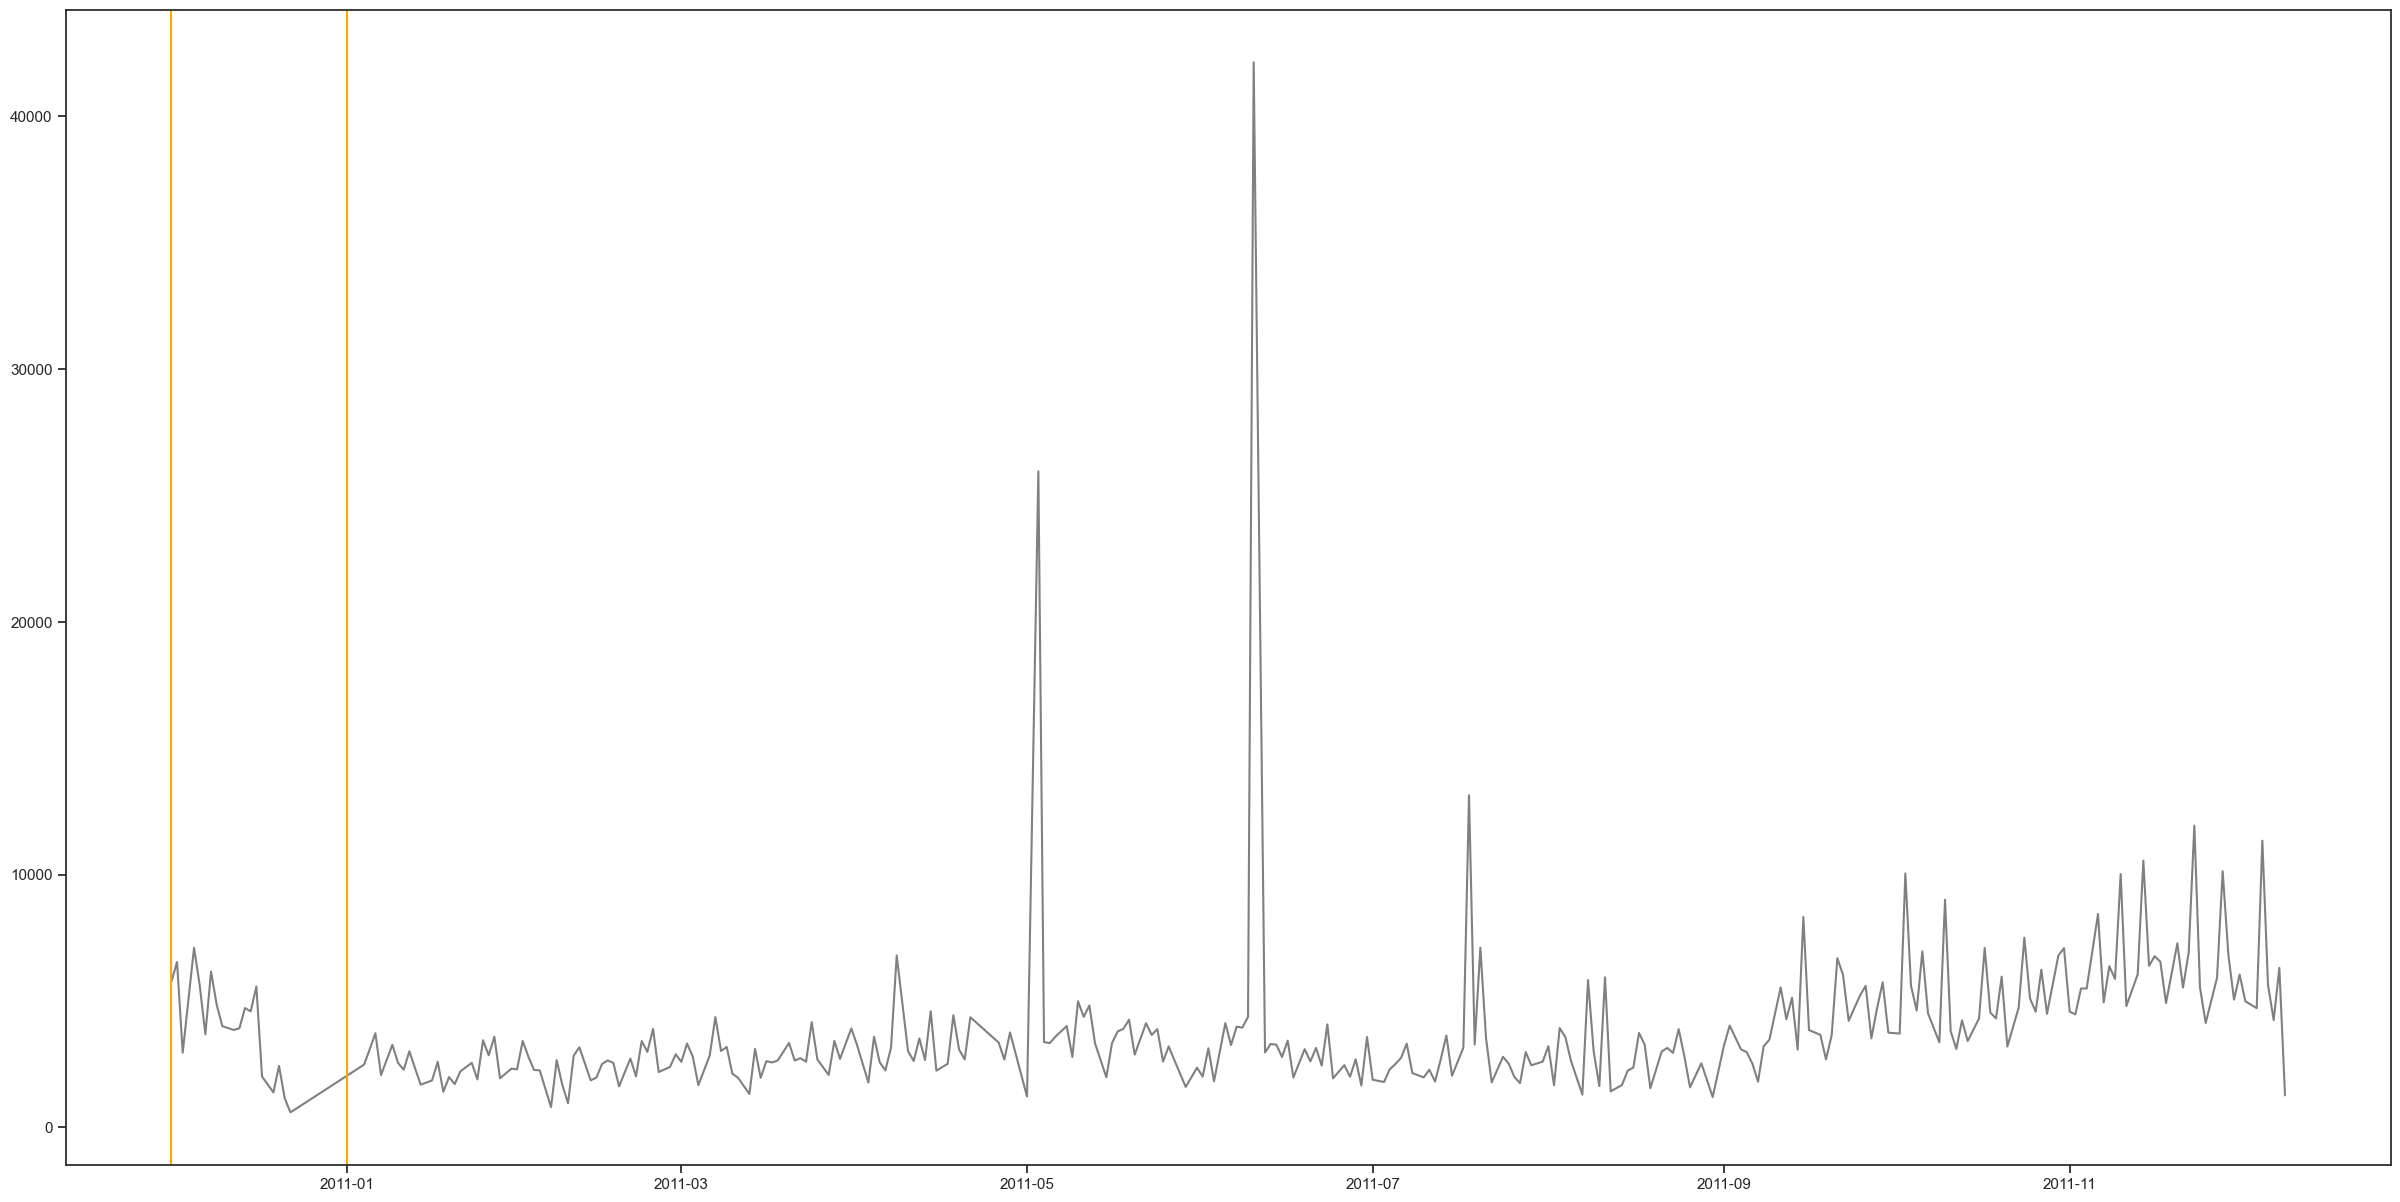

In [48]:
united_plot["UnitPrice"].plot(figsize=(30, 15), label="Price", color= "gray")
plt.axvline(x=pd.to_datetime('2010-12'),color='orange')
plt.axvline(x=pd.to_datetime('2011'),color='orange')
# plt.axvspan(pd.to_datetime('2012'),pd.to_datetime('2023-04'),color='#FF8A36',alpha=0.1)
# plt.title("Forecast")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.gca().set_facecolor('#E8E8E4')  
# plt.gcf().set_facecolor('#E8E8E4')
# plt.legend(facecolor='#E8E8E4')
# plt.legend()
# plt.show()


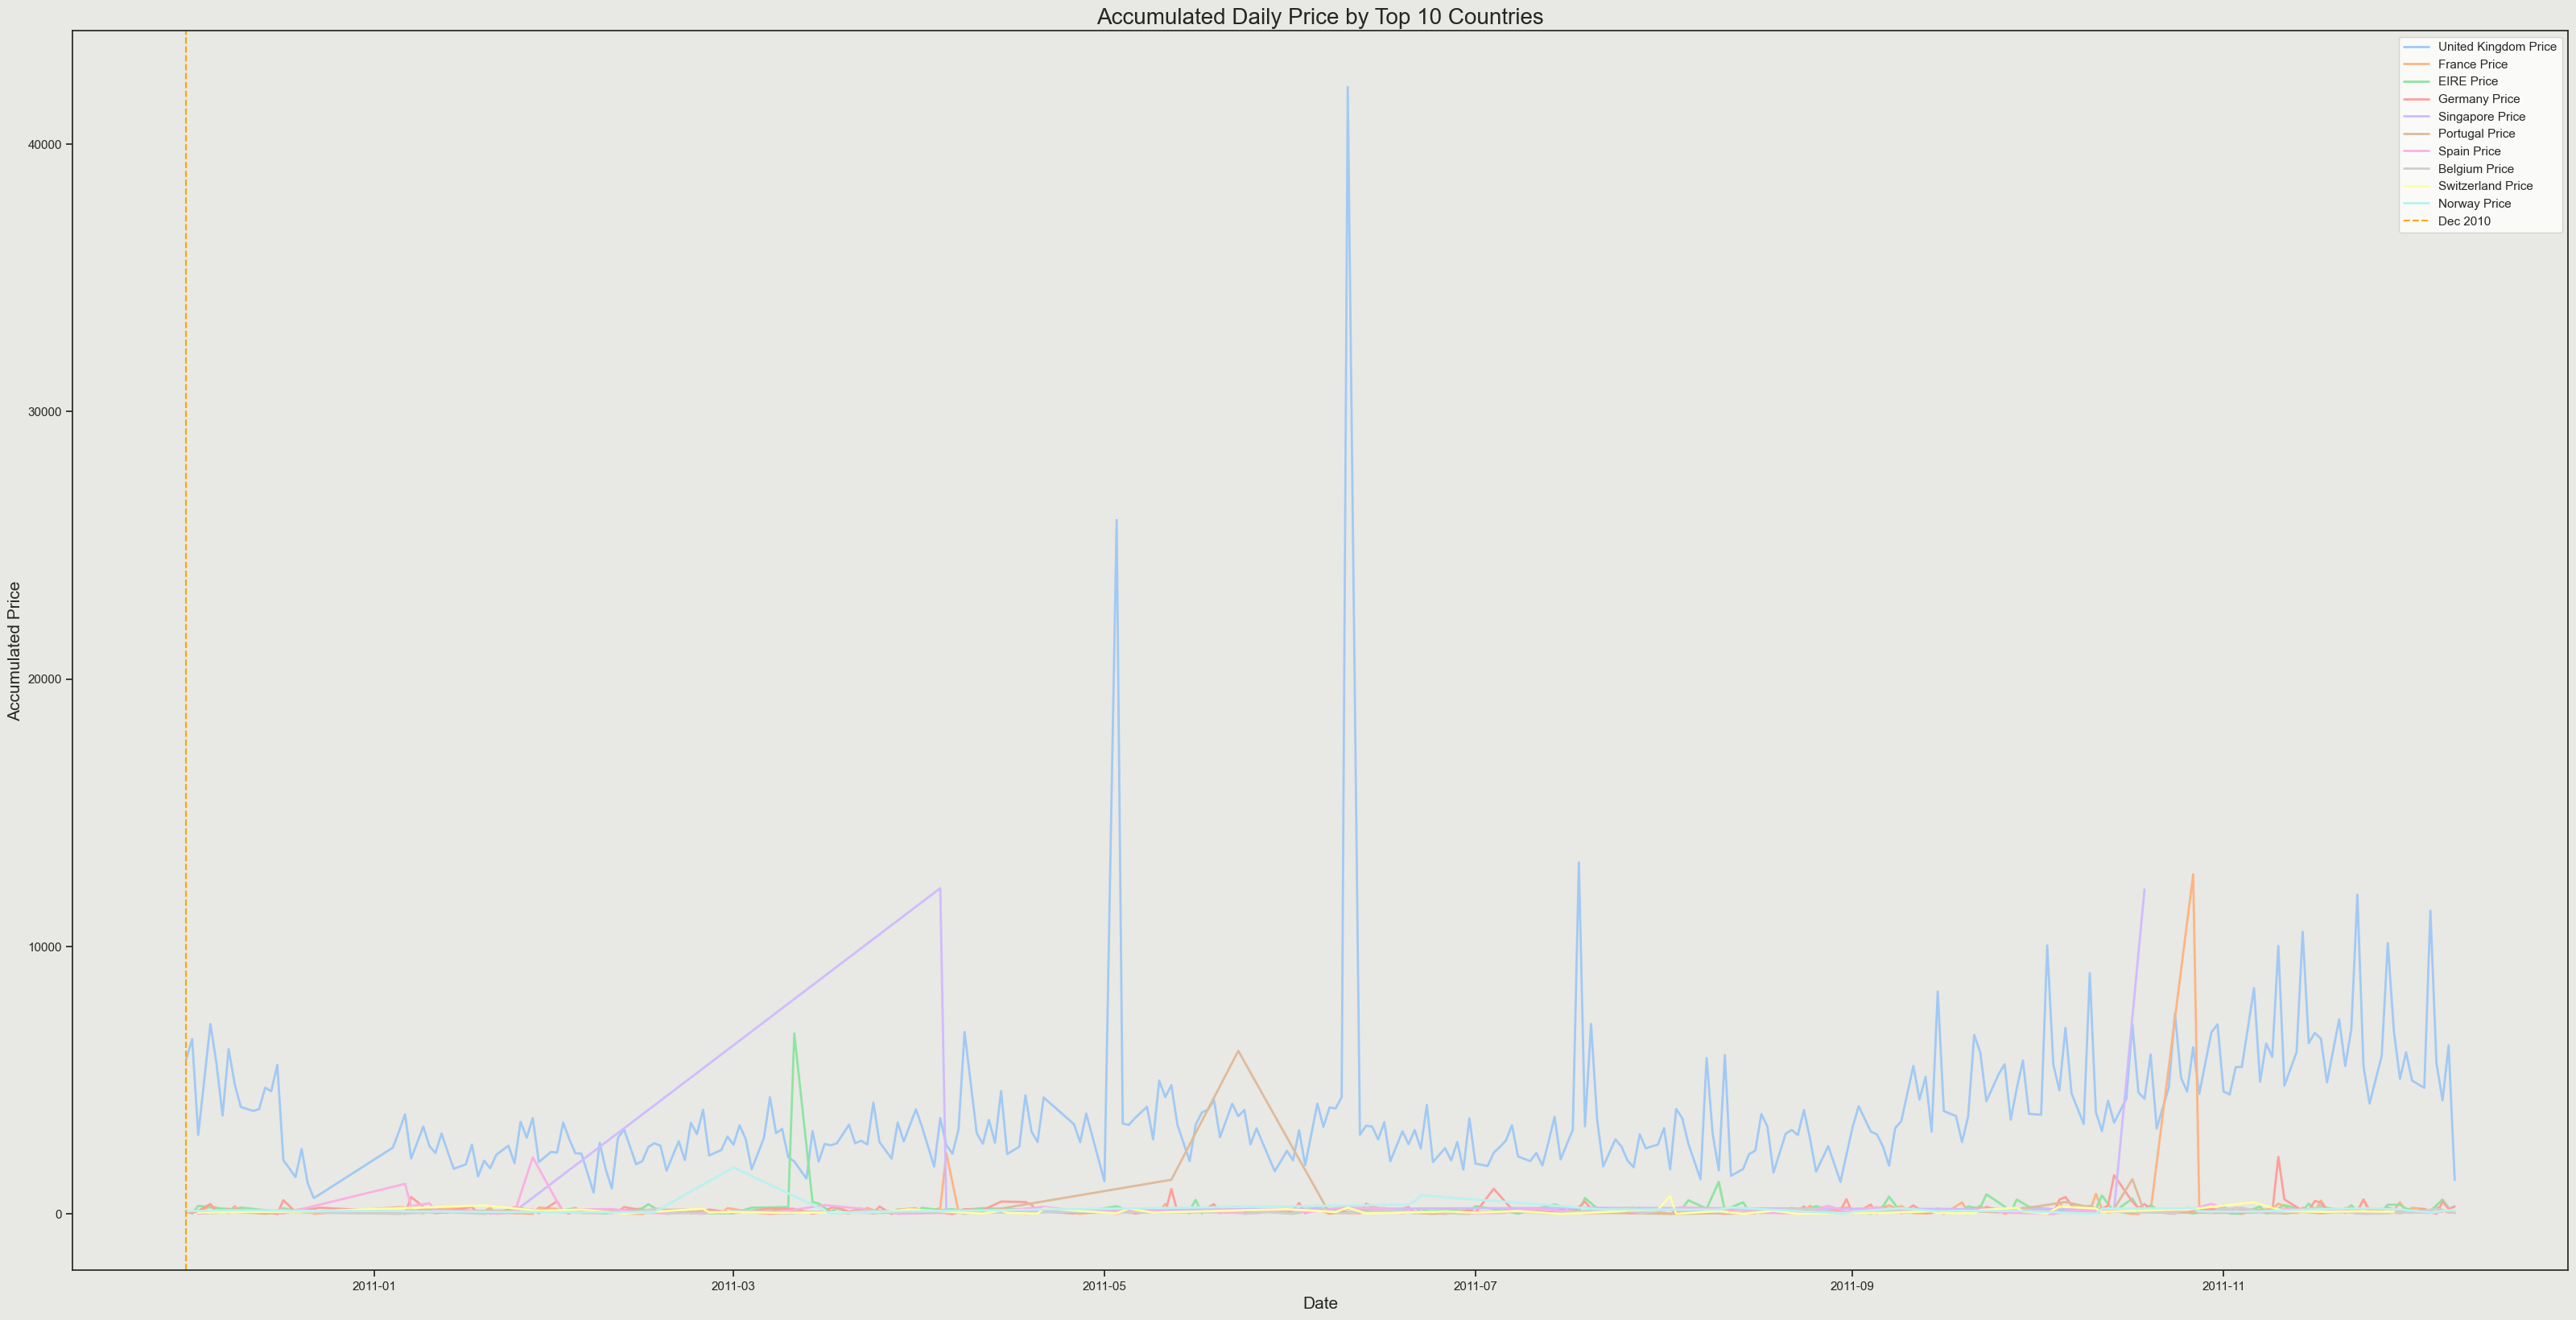

In [60]:
top_countries = (nuevo.groupby('Country')['UnitPrice']
                 .sum()
                 .nlargest(10)
                 .index)

plt.figure(figsize=(40, 20))

for country in top_countries:
    country_data = nuevo[nuevo['Country'] == country]
    
    country_plot = country_data.groupby(country_data.index.date).agg({'UnitPrice': 'sum'})
    
    country_plot["UnitPrice"].plot(label=f"{country} Price", linewidth=2)


plt.axvline(x=pd.to_datetime('2010-12'), color='orange', linestyle='--', label='Dec 2010')
plt.title("Accumulated Daily Price by Top 10 Countries", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Accumulated Price", fontsize=15)
plt.legend(title="Country", loc="upper left")
plt.gca().set_facecolor('#E8E8E4')  
plt.gcf().set_facecolor('#E8E8E4')
plt.legend(facecolor='#E8E8E4')
plt.legend()
plt.show()
plt.show()